In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
0.8*0.001/(0.8*0.001+ 0.1*0.999)

0.007944389275074478

#### Cancer Test Example
Let us apply Bayes' Rule to a Cancer Test Example which is a very common example in Statistic classes.
Suppose, there is a certain type of cancer which is extremely rare.

Let,
\begin{equation}
P(C) = 0.001
\end{equation}
In other words, $1$ in every $1000$ people has this cancer. Can you compute the probability of not having cancer?
\begin{equation}
P(\neg C) = ?
\end{equation}

The test for cancer is not $100\%$ accurate. Let us say, probability of the test being positive given someone has cancer is,
\begin{equation}
P(pos | C) = 0.8
\end{equation}
Can you compute the probability that the test is negative given someone has cancer?
\begin{equation}
P(neg | C) = ?
\end{equation}
Similarly, the probability of a test being positive given that someone has no cancer is $P(pos | \neg C) = 0.1$. Can you compute the probability that the test is negative given someone has no cancer?
\begin{equation}
P(neg | \neg C) = ?
\end{equation}

Can you compute the following?
\begin{equation}
P(C | pos) = ?
\end{equation}
Interpret the quantity you computed in words!

What we computed is very interesting. We computed probability of having cancer given the test results and how likely the disease is.

# Robot Programming Exercise

In this exercise we will apply basic concepts of probability and statistics to help a robot localise itself. Robot localization is an important task for any mobile robot as it needs to know where in the world it is currently situated in.

You may think robot localization is a very easy problem as you can use GPS. But no! GPS has errors in localization upto a few metres which is very inaccurate for self driving cars.

Hence, the robot needs to use sensors to locate itself. And sensors are noisy! Even the motion of a robot is uncertain.




P(red| red) = 0.75

P(green| red) = 0.25


P(red| green) = 0.25

p(green| green) = 0.75

In [3]:
P = np.array([[0.75,0.25],[0.25,0.75]])
colors = {'red':0,'green':1,0:'red',1:'green'}

In [4]:
# Modify the empty list, p, so that it becomes a UNIFORM probability
# distribution over n grid cells, as expressed in a list of 
# n probabilities.
def init_distribution(n,m=1):
    p = []
    # Add your code here
    if m <= 1:
        n,m = m,n
    p = np.ones((n,m))*1/(n*m)
    # End your code here
    return p

In [5]:
init_distribution(5)

array([[0.2, 0.2, 0.2, 0.2, 0.2]])

In [6]:
colors_img = {'red':(255,0,0),'green':(0,255,0)}
def get_color_vector(x):
    return colors_img[x]
def world_img(world):
    world = np.array(world)
    if len(world.shape) == 1:
        world = world.reshape((1,-1))
    img = np.array(np.vectorize(get_color_vector)(world.repeat(100, axis=0).repeat(100, axis=1)))
    img = img.transpose((1,2,0))
    img[:,100::100,:] = 0
    img[100::100,:,:] = 0
    return img

In [7]:


world = ['green','red','red','green','green']

def Prob(col1,col2):
    return P[colors[col1],colors[col2]]

array([[0.11111111, 0.33333333, 0.33333333, 0.11111111, 0.11111111]])

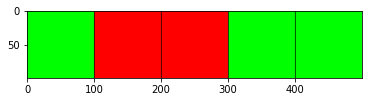

In [8]:
#Modify the code below so that the function sense, which 
#takes p and Z as inputs, will output the normalized 
#probability distribution, q, after multiplying the entries 
# in p according to the color in the corresponding cell in world,
# followed by normalization of the probability values
world=['green', 'red', 'red', 'green', 'green']
p = init_distribution(len(world))

def sense(p, Z):
    q = (p *np.vectorize(Prob)( world,Z))
    return q/np.sum(q)

plt.imshow(world_img(world))
sense(p, 'red')

In [9]:
sense(p,'green')

array([[0.27272727, 0.09090909, 0.09090909, 0.27272727, 0.27272727]])

In [10]:
world=['green', 'red', 'red', 'green', 'green']
p = init_distribution(len(world))
measurements = ['red','green']
for i in measurements:
    p = sense(p,i)
p

array([[0.2, 0.2, 0.2, 0.2, 0.2]])

In [11]:
def move(p,U):
    p = np.array(p)
    if len(p.shape) == 1:
        p = p.reshape((1,-1))
    U = U%p.shape[1]
    q = np.copy(p)
    if U == 0:
        return q
    else:
        q[:,U:] = p[:,0:-U]
        q[:,:U] = p[:,-U:]
    return q

In [12]:
move([0.11, 0.33, 0.33, 0.11, 0.11], 1)

array([[0.11, 0.11, 0.33, 0.33, 0.11]])

In [13]:
def move_inexact(p,U):
    return move(p,U-1)*0.1 + move(p,U)*0.8 + move(p,U+1) * 0.1
move_inexact([0, 1.0, 0, 0, 0], 2)

array([[0. , 0. , 0.1, 0.8, 0.1]])

In [14]:
def signum(x):
    return int(abs(x)/x) if x!=0 else 0

In [15]:
def move_stepwise(p,U,step = 1):
    p = np.array(p)
    for i in range(0,abs(U),step):
        p = move_inexact(p,step*signum(U))
    return p

In [16]:
move_stepwise([0, 1.0, 0, 0, 0], 2)

array([[0.01, 0.01, 0.16, 0.66, 0.16]])

In [17]:
move_stepwise([0,1,0,0,0],1000)

array([[0.2, 0.2, 0.2, 0.2, 0.2]])

In [18]:
def get_entropy(p):
    p = np.array(p)
    return np.sum(-p[np.where(p!=0)]*np.log2(p[np.where(p!=0)]))

In [19]:
get_entropy([0,1,0,0,0])

0.0

In [20]:
get_entropy(init_distribution(5))

2.321928094887362

In [21]:
-5*0.2*math.log2(0.2)

2.321928094887362

In [22]:
p = init_distribution(len(world))
measurements = ['red','green']
motions = [1,1]
for i in range(2):
    p = sense(p,measurements[i])
    p = move_stepwise(p,motions[i])
p

array([[0.21157895, 0.15157895, 0.08105263, 0.16842105, 0.38736842]])

# Todo for 2D matrix

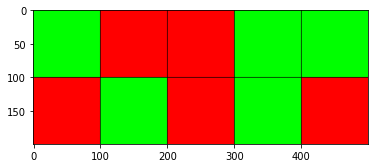

In [23]:
world=[['green', 'red', 'red', 'green', 'green'],['red','green','red','green','red']]
plt.imshow(world_img(world))

In [24]:
p = init_distribution(2,5)

In [25]:
def move_right(p,U):
    p = np.array(p)
    if len(p.shape) == 1:
        p = p.reshape((1,-1))
    U = U%p.shape[1]
    q = np.copy(p)
    if U == 0:
        return q
    else:
        q[:,U:] = p[:,0:-U]
        q[:,:U] = p[:,-U:]
    return q

In [26]:
def move_right_inexact(p,U):
    return move_right(p,U-1)*0.1 + move_right(p,U)*0.8 + move_right(p,U+1) * 0.1
move_right_inexact([[0, 1.0, 0, 0, 0],[0,0,0,0,0]], 2)

array([[0. , 0. , 0.1, 0.8, 0.1],
       [0. , 0. , 0. , 0. , 0. ]])

In [27]:
def move_right_stepwise(p,U,step = 1):
    p = np.array(p)
    for i in range(0,abs(U),step):
        p = move_right_inexact(p,step*signum(U))
    return p

In [28]:
move_right_stepwise([[0, 1.0, 0, 0, 0],[0,0,0,0,0]], 2)

array([[0.01, 0.01, 0.16, 0.66, 0.16],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

In [38]:
move_right_stepwise([[0, 1.0, 0, 0, 0],[0,0,0,0,0]], 2,step = 2)

array([[0. , 0. , 0.1, 0.8, 0.1],
       [0. , 0. , 0. , 0. , 0. ]])

In [29]:
move_right_stepwise([[0, 1.0, 0, 0, 0],[0,0,0,0,0]],1000)

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. ]])

In [30]:
def move_down(p,U):
    p = np.array(p)
    if len(p.shape) == 1:
        p = p.reshape((1,-1))
    U = U%p.shape[1]
    q = np.copy(p)
    if U == 0:
        return q
    else:
        q[U:,:] = p[0:-U,:]
        q[:U,:] = p[-U:,:]
    return q

In [31]:
move_down([[0, 1.0, 0, 0, 0],[0,0,0,0,0]],1)

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [32]:
def move_down_inexact(p,U):
    return move_down(p,U-1)*0.1 + move_down(p,U)*0.8 + move_down(p,U+1) * 0.1
move_down_inexact([[0, 1.0, 0, 0, 0],[0,0,0,0,0]], 2)

array([[0. , 0.9, 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0. , 0. ]])

In [33]:
def move_down_stepwise(p,U,step = 1):
    p = np.array(p)
    for i in range(0,abs(U),step):
        p = move_down_inexact(p,step*signum(U))
    return p

In [34]:
move_down_stepwise([[0, 1.0, 0, 0, 0],[0,0,0,0,0]], 2)

array([[0.  , 0.68, 0.  , 0.  , 0.  ],
       [0.  , 0.32, 0.  , 0.  , 0.  ]])

In [35]:
move_down_stepwise([[0, 1.0, 0, 0, 0],[0,0,0,0,0]],1000)

array([[0. , 0.5, 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. ]])